# DSCI 311 Project 2: Sustainability and Energy usage/production

## 1) Data Cleaning/Preprocessing

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from sklearn.linear_model import LinearRegression

### Import the data

In [545]:
energy = pd.read_csv("global-data-on-sustainable-energy.csv")
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### Rename / reorder columns

In [547]:
energy_simple = energy.rename(columns={'Entity': 'Country', 'Access to electricity (% of population)': 'Electr_access', 'Access to clean fuels for cooking': 'Fuel_access',
                      'Renewable-electricity-generating-capacity-per-capita': 'Renew_production_capacity', 'Financial flows to developing countries (US $)': 'Aid', 
                                      'Renewable energy share in the total final energy consumption (%)': 'Prop_renew_energy_consumed', 'Electricity from fossil fuels (TWh)': 'FF_produced', 
                                      'Electricity from nuclear (TWh)': 'Nuc_produced', 'Electricity from renewables (TWh)': 'Renew_produced', 
                                      'Low-carbon electricity (% electricity)': 'Prop_lowcarbon_produced', 'Primary energy consumption per capita (kWh/person)': 'Energy_consumption', 
                                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy_use_perGDP', 'Value_co2_emissions_kt_by_country': 'CO2_emissions', 
                                       'Renewables (% equivalent primary energy)': 'Prop_renew_energy_produced', 'Density\\n(P/Km2)': 'Density', 'Land Area(Km2)': 'Land_area', 'Latitude': 'Lat', 'Longitude': 'Long'})

### Making sure all number vals are ints/floats

In [549]:
for col in energy_simple.columns:
    if not isinstance(energy_simple[col][0], float) or isinstance(energy_simple[col][0], int):
        print(col)

Country
Year
Density


In [550]:
energy_simple['Density'] = energy_simple['Density'].str.replace(',', '', regex=False).astype(float)

I am also interested in looking at the total GDP for each country (instead of the gdp growth/gdp per capita), as well as the total energy consumption (instead of energy consumption per capita). Let's add these columns.

In [552]:
# Add a column of total GDP (Billions of $)
energy_simple['gdp'] = (energy_simple['gdp_per_capita'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# Add a column of total energy consumption (convert to TWh)
energy_simple['Energy_consumption_total'] = (energy_simple['Energy_consumption'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# drop unnecessary variables that we just needed for calculation
energy_simple.drop(columns=['gdp_per_capita', 'gdp_growth', 'Energy_consumption', 'Density', 'Land_area'], inplace=True) 

In [553]:
# Reorder the columns so similar variables are together
new_order = ['Country', 'Year', 'Renew_production_capacity', 'FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 
             'Prop_renew_energy_produced', 'Electr_access', 'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 
             'Aid', 'CO2_emissions', 'gdp', 'Lat', 'Long']

energy_simple = energy_simple[new_order]

### Granularity

In [555]:
print(max(energy_simple["Year"]), min(energy_simple["Year"])) # year range

print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries

2020 2000
176


In [556]:
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64
3649


**Granularity of the data:** Each row of the data represents a different year, from 2000-2020, repeated for each country.
There are 176 countries and 21 rows per country, except for 4 countries which have less years represented. There are 3649 rows total.

### Dealing with Missing values

In [559]:
missing_values = energy_simple.isna().sum()
proportion_missing = missing_values / energy_simple.shape[0]
print(f'Missing proportions of variables:\n {proportion_missing.sort_values(ascending=False)}')

Missing proportions of variables:
 Prop_renew_energy_produced    0.585640
Aid                           0.572486
Renew_production_capacity     0.255138
CO2_emissions                 0.117292
gdp                           0.077281
Energy_use_perGDP             0.056728
Prop_renew_energy_consumed    0.053165
Fuel_access                   0.046314
Nuc_produced                  0.034530
Prop_lowcarbon_produced       0.011510
FF_produced                   0.005755
Renew_produced                0.005755
Electr_access                 0.002740
Lat                           0.000274
Long                          0.000274
Energy_consumption_total      0.000274
Year                          0.000000
Country                       0.000000
dtype: float64


<Axes: >

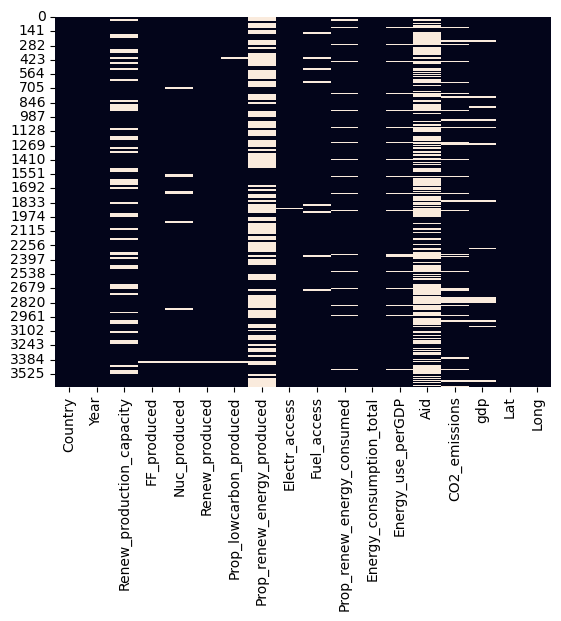

In [560]:
sns.heatmap(energy_simple.isna(), cbar=False)

**The variables with the most significant proportions of missing variables are:**
- Prop_renew_energy_produced, or the proportion of a country's overall energy they produce that comes from renewables. Over 50% of this data is missing, so it might be best practice to just drop the variable entirely rather than try to interpolate it for thousands of rows/entries.

In [562]:
energy_simple = energy_simple.drop('Prop_renew_energy_produced', axis=1)

- Aid, or the financial assistance a developing country received from developed countries for renewable energy. Around half of this data is missing. However, we can reasonably infer that a missing value is equivalent to a value of 0 dollars in financial aid, and therefore fill the NA values with 0.

In [564]:
energy_simple['Aid'] = energy_simple['Aid'].fillna(0)

- Renew_production_capacity, or the renewable energy production capacity per person in a given country. Let's examine where the data is missing:

In [566]:
energy_simple[energy_simple['Renew_production_capacity'].isna()].groupby('Country').count()['Year']

Country
Albania                   21
Australia                 21
Austria                   21
Belarus                   21
Belgium                   21
Bermuda                   21
Bosnia and Herzegovina    21
Bulgaria                  21
Canada                    21
Croatia                   21
Cyprus                    21
Czechia                   21
Denmark                   21
Estonia                   21
Finland                   21
France                    21
Germany                   21
Greece                    21
Hungary                   21
Iceland                   21
Ireland                   21
Israel                    21
Italy                     21
Japan                     21
Latvia                    21
Lithuania                 21
Luxembourg                21
Malta                     21
Montenegro                14
Netherlands               21
New Zealand               21
North Macedonia           21
Norway                    21
Poland                    21
Portug

Since there are 21 rows per country (2000-2020), it seems like the data is missing in every single row/year for a lot of these countries. In addition, some of these countries would be points of interest in our analysis like the United States (known high GDP and high CO2 emissions, good for analysis). Because of this, I am choosing to exclude this entire variable from the data because it would be too difficult to fill.

In [568]:
energy_simple = energy_simple.drop('Renew_production_capacity', axis=1)

- CO2_emissions has about 11% of the data missing. Let's examing the countries that have some data missing vs. all. We can drop the rows for countries that have no data at all for CO2 emissions, because this variable is key in our analysis.

In [570]:
missing = energy_simple[energy_simple['CO2_emissions'].isna()].groupby('Country').count().reset_index()

countries_with_data = missing[missing['Year'] < 21] # countries with at least some data
countrynames_with_data = countries_with_data['Country'].tolist() # list of country names

countries_to_drop = missing[missing['Year'] == 21] # countries with all CO2 data missing
countrynames_drop = countries_to_drop['Country'].tolist() # list of country names

print(f"The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only {
countries_with_data['Year'].max()}. Let's drop the rest, since the rest have no data at all for CO2.")

The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only 4. Let's drop the rest, since the rest have no data at all for CO2.


In [571]:
# drop the countries/rows with no data at all:
i_to_drop = energy_simple[energy_simple['Country'].isin(countrynames_drop)].index # find indices of rows to drop
energy_simple = energy_simple.drop(i_to_drop) # drop the rows

In [572]:
# We also need to consider countries which may have less than 21 rows of data in the first place, 
# and examine how much of their CO2 data is missing
print(missing_yrs["Year"])
missing[(missing['Country'] == 'French Guiana') | (missing['Country'] == 'Montenegro') | (missing['Country'] == 'Serbia') | (missing['Country'] == 'South Sudan')]

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64


,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
58,French Guiana,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0
105,Montenegro,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
140,Serbia,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
149,South Sudan,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1


Since French Guiana only has 1 entry in the entire dataset and the CO2 value is missing for that 1 entry, we will drop the entire row/country.

In [574]:
# drop French Guiana
i_to_drop = energy_simple[energy_simple['Country'] == 'French Guiana'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop row

I also want to make sure there is enough data for GDP by country, since I want to examine country GDP in relation to my other variables.

In [576]:
energy_simple[energy_simple['gdp'].isna()].groupby('Country').count().reset_index()[['Country', 'Year']]

,Country,Year
0,Afghanistan,2
1,Aruba,2
2,Cayman Islands,6
3,Czechia,21
4,Eritrea,9
5,Nauru,10
6,New Caledonia,1
7,Sao Tome and Principe,1
8,Somalia,13
9,South Sudan,5


The only country with no data at all for gdp is Czechia. Since Gdp is an important part of our analysis, we can remove this data for Czechia for consistency.

In [578]:
# Drop Czechia
i_to_drop = energy_simple[energy_simple['Country'] == 'Czechia'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop rows

Next, missing variables like Nuc_produced (electricity produced from nuclear energy by country) and Fuel_access can be filled with 0 due to lack of data.

In [580]:
energy_simple['Nuc_produced'] = energy_simple['Nuc_produced'].fillna(0)
energy_simple['Fuel_access'] = energy_simple['Fuel_access'].fillna(0)

The rest of our missing data is missing at a proportion of less than 10% of the total, and for these variables the missing values are also spread out over different years. Let's fill the rest of the missing data with the average of the values for each country, to try and preserve country-level trends.

In [582]:
columns_to_fill = ['FF_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access', 'Prop_renew_energy_consumed', 'Energy_use_perGDP', 'CO2_emissions', 'gdp']

for column in columns_to_fill: 
    energy_simple[column] = energy_simple.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

<Axes: >

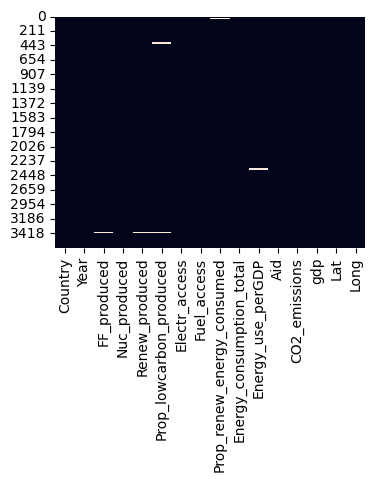

In [583]:
plt.figure(figsize=(4,3))
sns.heatmap(energy_simple.isna(), cbar=False)

The remaining missing data that couldn't be filled by column averages is data which is missing from every single year for a particular country. Since we can see above that this is very few countries, let's just drop those rows to complete our data cleaning.

In [585]:
energy_simple.dropna(inplace=True)

<Axes: >

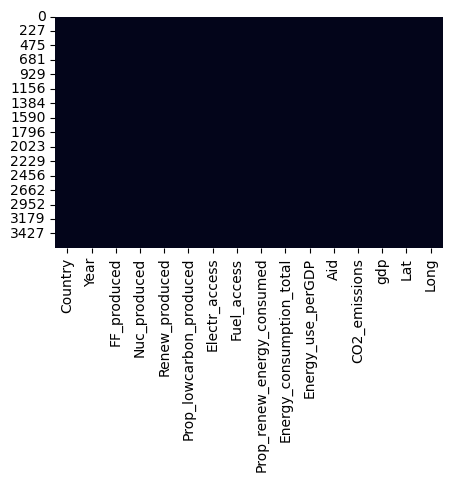

In [586]:
# let's look at how much it's improved!
plt.figure(figsize=(5,3))
sns.heatmap(energy_simple.isna(), cbar=False)

In [587]:
print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

158
Country
Montenegro     14
Serbia         14
South Sudan     8
Name: Year, dtype: int64
3291


After cleaning and dropping irrelevant parts of our data, we now have a granularity of 158 countries and 21 rows per country, except for the 3 countries which have less years represented.

### Our Variables After Data Cleaning:

In [590]:
energy_simple.head()

,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,2000,0.16,0.0,0.31,65.957440,1.613591,6.2,44.99,11.841685,1.64,20000.0,760.000000,17.181920,33.93911,67.709953
1,Afghanistan,2001,0.09,0.0,0.50,84.745766,4.074574,7.2,45.60,9.270478,1.74,130000.0,730.000000,17.181920,33.93911,67.709953
2,Afghanistan,2002,0.13,0.0,0.56,81.159424,9.409158,8.2,37.83,8.251837,1.40,3950000.0,1029.999971,7.021644,33.93911,67.709953
3,Afghanistan,2003,0.31,0.0,0.63,67.021280,14.738506,9.5,36.66,8.999530,1.40,25970000.0,1220.000029,7.462182,33.93911,67.709953
4,Afghanistan,2004,0.33,0.0,0.56,62.921350,20.064968,10.9,44.24,7.992345,1.20,0.0,1029.999971,8.272184,33.93911,67.709953


#### Variables relating to production:
- **FF_produced:** Electricity generated from fossil fuels (coal, oil, gas) (TWh)
- **Nuc_produced:** Electricity generated from nuclear power (TWh)
- **Renew_produced:** Electricity generated from renewable sources (hydro, solar, wind, etc.) (TWh)
- **Prop_lowcarbon_produced:** Percentage of electricity from low-carbon sources (BOTH nuclear and renewables).

#### Variables relating to consumption:
- **Electr_access:** The percentage of population with access to electricity
- **Fuel_access:** The percentage of the population with access to clean fuels (for cooking)
- **Prop_renew_energy_consumed:** Percentage of the total ENERGY consumption that is from renewable sources
- **Energy_consumption_total:** Country's ENERGY consumption / demand, total (TWh)
- **Energy_use_perGDP:** Reflects the efficiency of energy use per unit of GDP (rate of converting energy into GDP or $)

#### Variables Which Could Provide Context or Influences:
- **Country:** country name
- **Year:** years ranging from 2000-2020
- **Aid:** Assistance (US dollars) from developed countries to developing countries for clean energy projects
- **CO2_emissions:** Carbon dioxide emissions per country in kilotons.
- **gdp:** TOTAL gross domestic product for the country in that year (Billions of dollars)
- **Latitude:** Latitude of the country's centroid (decimal degrees)
- **Longitude:** Longitude of the country's centroid (decimal degrees)

## 2) Exploratory Data Analysis

### Ways to look at the data:
- **Country-based analysis** (grouping by country) to compare overall/summary metrics of countries in terms of GDP, energy consumption, renewable energy, CO2 emissions, etc.
- **Time-series analysis** (grouping by year) to look at trends over time, either for individual countries or for global visualizations (multiple countries with different characteristics)

I am interested in investigating patterns & relationships between countries with different characteristics, so I will group by **country** to look at the variables in terms of their averages from 2000-2020.

## Country-based analysis (group by country)

I want to compare the correlations between average variables once I group by country and take the average of all years 2000-2020. This will allow me to see larger-scale patterns in the data simplified over the range of time.

I'm also interested in looking at the distribution of metrics for each country, like for example: average GDP and average CO2 emissions, to see which countries have the highest and the lowest values.

In [597]:
# group by country
country_averages = energy_simple.groupby('Country').mean().reset_index().drop(columns=['Year'])
country_averages.head()

,Country,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,0.189524,0.000000,0.740952,78.872636,52.520488,19.802381,25.6805,27.286752,2.0390,2.982952e+07,4073.000025,17.181920,33.939110,67.709953
1,Algeria,46.895714,0.000000,0.365238,0.742125,99.108146,98.904762,0.2870,554.134892,4.4985,3.852381e+05,119921.000066,162.388799,28.033886,1.659626
2,Angola,2.040476,0.000000,4.420952,68.980548,35.138564,44.933333,57.6970,100.549123,2.8965,4.535714e+06,21689.499863,96.677575,-11.202692,17.873887
3,Antigua and Barbuda,0.271429,0.000000,0.002857,0.861557,98.823761,100.000000,0.2005,3.167717,3.6240,1.385714e+06,512.999998,1.339125,17.060816,-61.796428
4,Argentina,76.309524,6.722857,33.811429,35.772016,98.241525,98.469048,9.5605,990.460423,3.4975,2.279024e+08,160462.001865,436.685434,-38.416097,-63.616672


### Distributions Analysis

Let's visualize some of the variables per country like CO2 emissions, GDP, and electricity from different sources, per country. These plots will show the distribution shape, and we will see if the data is skewed or normally distributed. We can also transform/linearize data that is not already normally distributed.

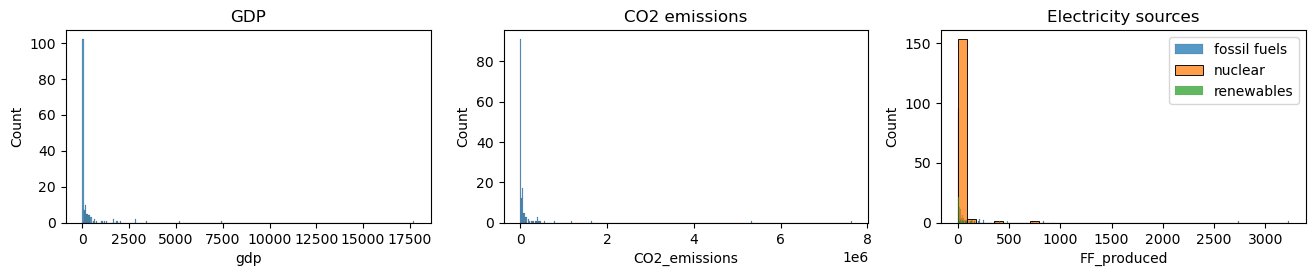

In [600]:
fig, axes = plt.subplots(1, 3, figsize=(16, 2.5))  # 3 plots
# GDP
sns.histplot(x=country_averages['gdp'], ax=axes[0])
axes[0].set_title("GDP")
# CO2
sns.histplot(x=country_averages['CO2_emissions'], ax=axes[1])
axes[1].set_title("CO2 emissions")
# Electr sources
sns.histplot(x=country_averages['FF_produced'], ax=axes[2], label='fossil fuels')
sns.histplot(x=country_averages['Nuc_produced'], ax=axes[2], label='nuclear')
sns.histplot(x=country_averages['Renew_produced'], ax=axes[2], label='renewables')
axes[2].set_title("Electricity sources")
plt.legend()

Both average GDP and average CO2 emissions across the time period, as well as electricity generated from all sources, are skewed right if plotted in original units. This means they would have a long right tail, i.e. only a few countries have extremely high values whereas the bulk of countries have much lower values. This makes sense because there are few large, industrialized countries which have very high GDP, energy/electricity production, and CO2 emissions.

In [602]:
# log scaled variables in their own dataframe
country_avg_scaled = country_averages.copy()
country_avg_scaled['log_gdp'] = np.log(country_avg_scaled['gdp'].replace(0, np.nan).replace(-np.inf, np.nan))
country_avg_scaled['log_co2'] = np.log(country_avg_scaled['CO2_emissions'].replace(0, np.nan).replace(-np.inf, np.nan))
country_avg_scaled['log_ff'] = np.log(country_avg_scaled['FF_produced'].replace(0, np.nan).replace(-np.inf, np.nan))
country_avg_scaled['log_nuc'] = np.log(country_avg_scaled['Nuc_produced'].replace(0, np.nan).replace(-np.inf, np.nan))
country_avg_scaled['log_renews'] = np.log(country_avg_scaled['Renew_produced'].replace(0, np.nan).replace(-np.inf, np.nan))

country_avg_scaled.drop(columns=['gdp', 'CO2_emissions', 'FF_produced', 'Nuc_produced', 'Renew_produced'], inplace=True)
country_avg_scaled.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

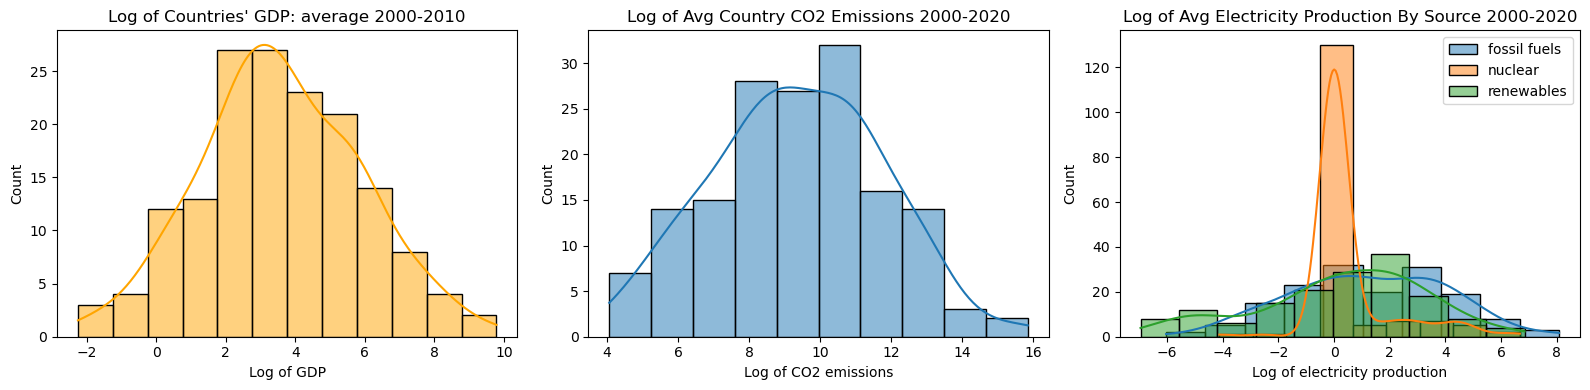

In [603]:
# plot Average CO2 emissions and Average GDP from 2000-2020 from all countries (LOG SCALE)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 3 plots
# LOG GDP
sns.histplot(x=country_avg_scaled['log_gdp'], kde=True, ax=axes[0], color='orange')
axes[0].set_title("Log of Countries' GDP: average 2000-2010")
axes[0].set_xlabel("Log of GDP")
# LOG CO2
sns.histplot(x=country_avg_scaled['log_co2'], kde=True, ax=axes[1])
axes[1].set_title("Log of Avg Country CO2 Emissions 2000-2020")
axes[1].set_xlabel("Log of CO2 emissions")
# LOG ELEC SOURCES
sns.histplot(x=country_avg_scaled['log_ff'], kde=True, ax=axes[2], label='fossil fuels')
sns.histplot(x=country_avg_scaled['log_nuc'], kde=True, ax=axes[2], label='nuclear')
sns.histplot(x=country_avg_scaled['log_renews'], kde=True, ax=axes[2], label='renewables')
plt.legend()
axes[2].set_title("Log of Avg Electricity Production By Source 2000-2020")
axes[2].set_xlabel("Log of electricity production")

plt.tight_layout()
plt.show()

All variables take on fairly normal distributions if plotted on a log scale.

Log(GDP) is centered around 3 billion dollars, and log(CO2_emissions) is centered around 9 kilotons.

In terms of electricity production sources, log(fossil fuel production) and log(renewable production) are centered around 2 TWh with a wide spread, whereas log(nuclear production) is centered on 0 with a high magnitude at 0 (nuclear electricity production is not very common).

### Principal Components Analysis

Let's look at how much some variables affect the variance of the data, explained in terms of the first two principal components (combinations of the variables, explain the majority of the data's variance across space).

In [607]:
# PCA: standardize data
from sklearn.preprocessing import StandardScaler

energy_feats = country_avg_scaled[["log_ff", "log_nuc", "log_renews", "Electr_access", 
                                 "Prop_renew_energy_consumed", "log_gdp"]].dropna()
features_std = StandardScaler().fit_transform(energy_feats)
features_std = pd.DataFrame(features_std, columns = energy_feats.columns)

In [608]:
# singular value decomposition (SVD)
u, s, vt = np.linalg.svd(features_std, full_matrices = False)
vt = pd.DataFrame(vt, columns = energy_feats.columns, index = ["v1","v2","v3","v4","v5","v6"])
new_energy = features_std @ vt.T

var_explained = s**2/len(features_std)
percent_var_explained = var_explained/np.sum(var_explained)

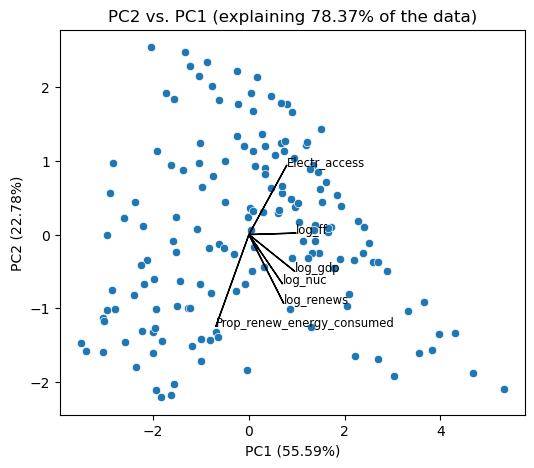

In [609]:
# plot loadings of each variable on PC1, PC2

#offsets = np.random.uniform(0, 1, vt.shape[1])*.3
plt.figure(figsize = (6, 5))
plt.title(f"PC2 vs. PC1 (explaining {np.round(percent_var_explained[0]*100 + percent_var_explained[1]*100, 2)}% of the data)")
plt.xlabel(f"PC1 ({np.round(percent_var_explained[0]*100,2)}%)")
plt.ylabel(f"PC2 ({np.round(percent_var_explained[1]*100,2)}%)")
sns.scatterplot(x = new_energy["v1"], y = new_energy["v2"]);

for i in range(vt.shape[1]):
    plt.arrow(0, 0, vt.iloc[0,i]*2, vt.iloc[1,i]*2, color = "black")
    plt.text(vt.iloc[0,i]*2, vt.iloc[1,i]*2, features_std.columns[i], fontsize = "small")

#### What we can see from this graph:

- Two variables that affect the spread/variance of the data highly are **access to electricity** and the **proportion of energy derived from renewable sources**. The lines/arrows representing these two variables point opposite directions, indicating an inverse correlation.

- Electricity sourced from nuclear & renewables are correlated/affect the spread of the data similarly
- Electricity sourced from fossil fuels affects the spread in a slightly different direction than the other sources
- Countries' GDP affects the data's variance in a _perpendicular direction_ (aka effects the variance independently) from access to electricity & the proportion of energy from renewables

### Linear correlations exploration

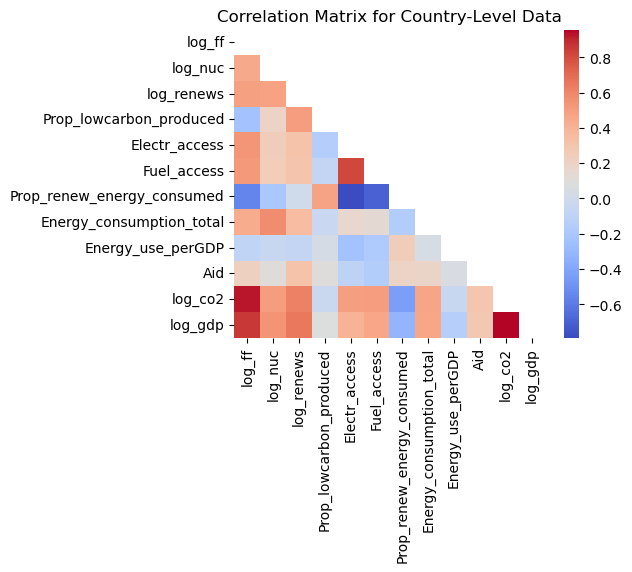

In [612]:
# Calculate correlations for country-level data
desired_variables = country_avg_scaled[['Country', 'log_ff', 'log_nuc', 'log_renews', 'Prop_lowcarbon_produced', 'Electr_access',
                                      'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 'Aid',
                                      'log_co2', 'log_gdp']]
                                      
corr = desired_variables.set_index('Country').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap of correlations
plt.figure(figsize=(5,4))
sns.heatmap(corr, mask=mask, cmap='coolwarm')
plt.title('Correlation Matrix for Country-Level Data')
plt.show()

#### Some notable correlations:
- GDP, co2 emissions, and fossil fuel usage are all highly positively correlated.
- GDP is positively correlated with access to electricity & fuel, electricity production from all sources, and total energy production.
- CO2 emissions are also, interestingly, positively correlated with _all three_ electricity-generation sources (including renewables).
- There is also high correlation between the production of electricity between different sources, like fossil fuel production and renewable production. This is likely because countries that generate a lot of energy are probably going to be generating high amounts from _all sources_, not just one.

- There is a strong _negative_ correlation between electricity/fuel access and the proportion of renewable energy consumed. In other words, people in countries without much access to electricity and fuels for cooking depend more on renewable energy.

### Visualizing some of these relationships through scatterplots

#### GDP:

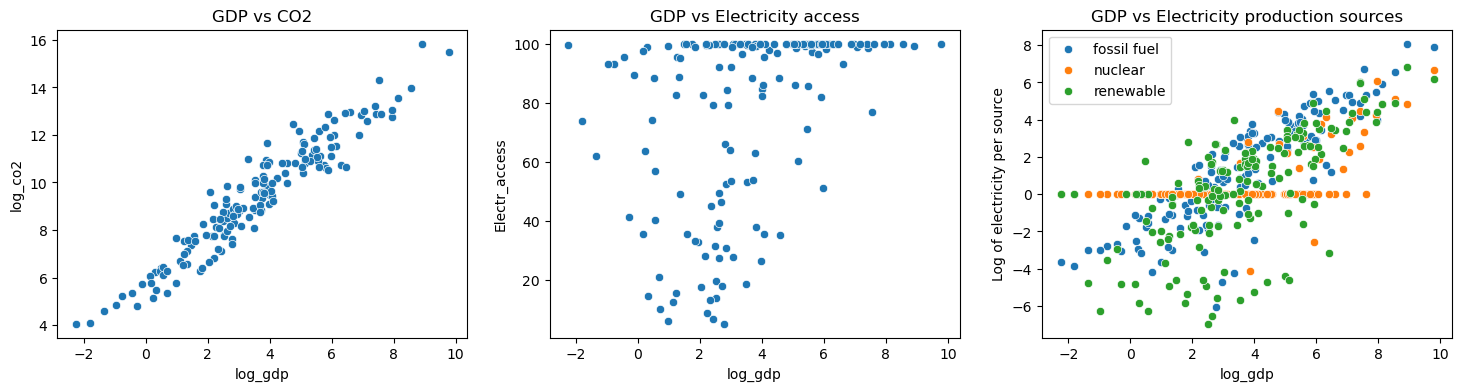

In [616]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 3 plots

# GDP vs CO2
sns.scatterplot(x='log_gdp', y='log_co2', data=country_avg_scaled, ax=axes[0])
axes[0].set_title("GDP vs CO2")
# GDP vs Electricity access
sns.scatterplot(x='log_gdp', y='Electr_access', data=country_avg_scaled, ax=axes[1])
axes[1].set_title("GDP vs Electricity access")
# GDP vs electricity from different sources
sns.scatterplot(x='log_gdp', y='log_ff', data=country_avg_scaled, ax=axes[2], label='fossil fuel')
sns.scatterplot(x='log_gdp', y='log_nuc', data=country_avg_scaled, ax=axes[2], label='nuclear')
sns.scatterplot(x='log_gdp', y='log_renews', data=country_avg_scaled, ax=axes[2], label='renewable')
axes[2].set_title("GDP vs Electricity production sources")
axes[2].set_ylabel("Log of electricity per source")
plt.legend()
plt.show()

#### OTHER VARIABLE RELATIONSHIPS:

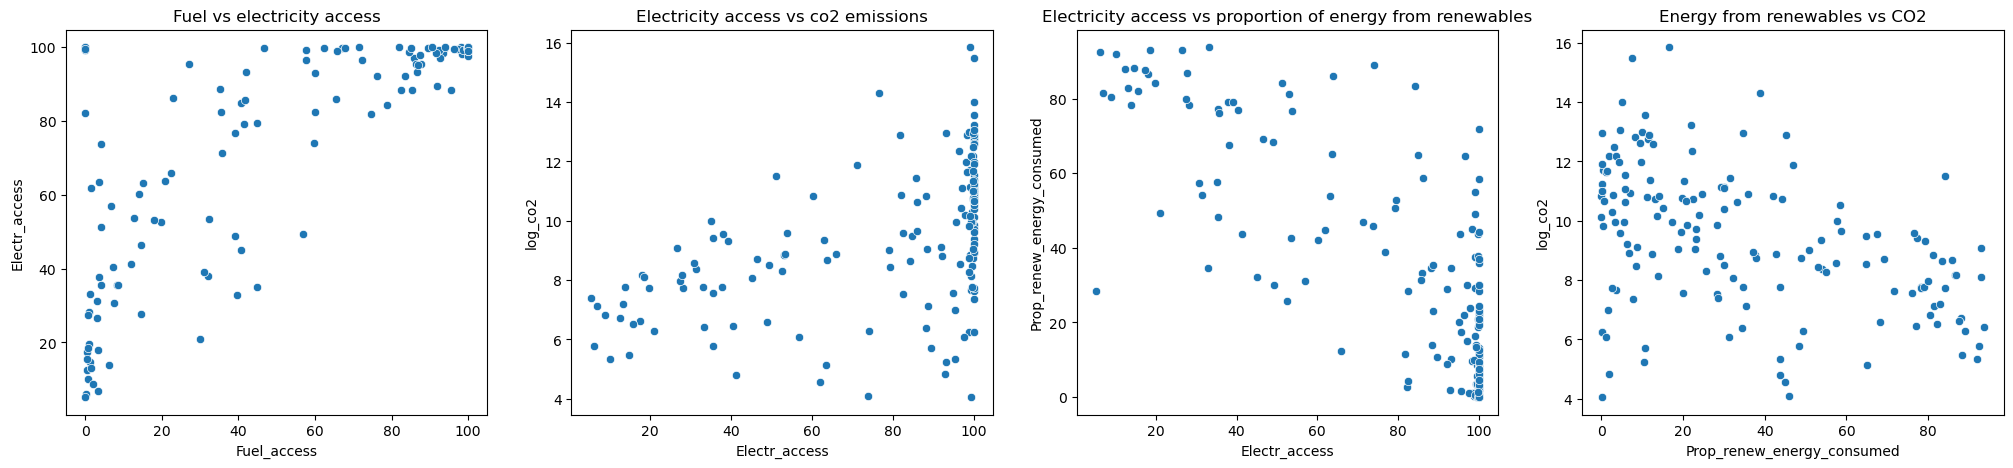

In [852]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))  # 3 plots

# Fuel and electricity access: correlated
sns.scatterplot(x='Fuel_access', y='Electr_access', data=country_avg_scaled, ax=axes[0])
axes[0].set_title("Fuel vs electricity access")

# Electricity access and co2 production: correlated
sns.scatterplot(x='Electr_access', y='log_co2', data=country_avg_scaled, ax=axes[1])
axes[1].set_title("Electricity access vs co2 emissions")

# electricity access and energy from renewables: INVERSE
sns.scatterplot(x='Electr_access', y='Prop_renew_energy_consumed', data=country_avg_scaled, ax=axes[2])
axes[2].set_title("Electricity access vs proportion of energy from renewables")

# proportion energy from renewables vs co2 emissions
sns.scatterplot(x='Prop_renew_energy_consumed', y='log_co2', data=country_avg_scaled, ax=axes[3])
axes[3].set_title("Energy from renewables vs CO2")
plt.show()

#### SPATIAL RELATIONSHIPS:

Text(0.5, 1.0, 'CO2 emissions')

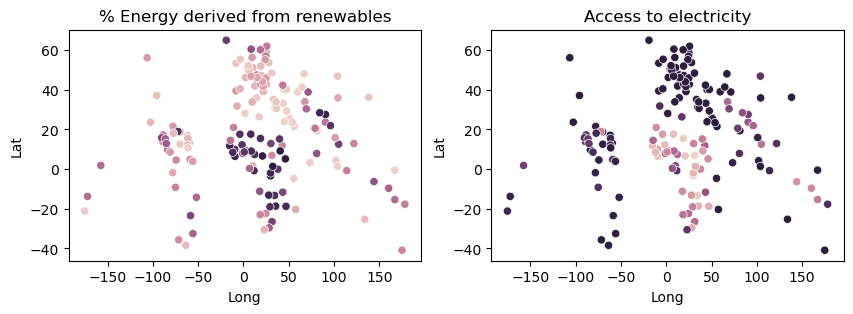

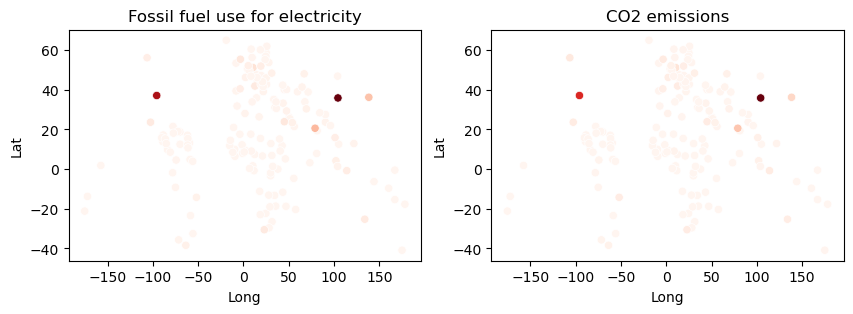

In [620]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 2 plots

sns.scatterplot(x='Long', y='Lat', hue='Prop_renew_energy_consumed', data=country_averages, legend=False, ax=axes[0])
axes[0].set_title("% Energy derived from renewables")

sns.scatterplot(x='Long', y='Lat', hue='Electr_access', data=country_averages, legend=False, ax=axes[1])
axes[1].set_title("Access to electricity")

fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # 2 plots

sns.scatterplot(x='Long', y='Lat', hue='FF_produced', data=country_averages, palette='Reds', legend=False, ax=axes[0])
axes[0].set_title("Fossil fuel use for electricity")

sns.scatterplot(x='Long', y='Lat', hue='CO2_emissions', data=country_averages, palette='Reds', legend=False, ax=axes[1])
axes[1].set_title("CO2 emissions")

We can interpret each plot above as a sort of map, with each point representing the center of a country. The point clouds form the shape of continents in a world map. 

We can see in the top 2 plots that there is a strong opposite relationships between the % energy from renewables and access to electricity, notably countries in the continent of Africa having low access to electricity but very high amounts of energy generated from renewable sources.

In the bottom 2 plots, we can see that among all the world's countries there are 2 distinct contributors to the highest fossil fuel use and the highest CO2 emissions, with the other countries' points not even coming close to those high levels. These two points are likely the United States and China.

## 3) Inference:

I would like to investigate whether or not there is a statistically significant _difference_ between the proportion of energy derived from renewables for countries with a high GDP (averaged over the 20-year period) versus a low GDP.

- My **null** hypothesis that there is no difference between the mean renewable energy consumption in high vs low GDP countries.
- My **alternative** hypothesis that there _is_ a significant difference between the mean renewable energy consumption in high vs low GDP countries.

To test it, I will bootstrap/resample the original dataset, **shuffle** the renewable energy usage column, **average** the gdp & renewable energy across all years, **classify** countries' average GDP into classes, and find the difference in means of renewable energy usage between the **high** and **low** gdp classes. This will test if a difference in means as extreme as the observed one could arise due to random chance, by comparing it to a null distribution generated over many shuffled samples.

In [695]:
# classification function, adds a column with GDP class to the dataframe
def classify_gdp(df):
    gdp_quantiles = np.percentile(df['log_gdp'], [33, 66]) # divide in 3 groups, using log_gdp
    df['gdp_class'] = pd.cut( # add a column for classification
        df['log_gdp'],
        bins=[-np.inf, gdp_quantiles[0], gdp_quantiles[1], np.inf],
        labels=['Low', 'Medium', 'High']
    )

# function for finding difference in means AFTER CLASSIFYING
def diff_in_means(df):
    # find average per gdp class
    class_means = df.drop(columns=['Country']).groupby('gdp_class', observed=False).mean().reset_index()

    # find diff in means
    highgdp = class_means.loc[class_means['gdp_class'] == 'High', 'Prop_renew_energy_consumed']
    lowgdp = class_means.loc[class_means['gdp_class'] == 'Low', 'Prop_renew_energy_consumed']
    if not highgdp.empty and not lowgdp.empty:  # Ensure both categories exist
        difference = highgdp.values[0] - lowgdp.values[0]

    return difference

In [732]:
# First, find the actual OBSERVED difference in means from original data
# we can use the country_avg_scaled dataset, since it's the original data averaged and log-transformed already.

# Classify by gdp classes using our function
classify_gdp(country_avg_scaled)

# find diff in means using our function
observed_diff = diff_in_means(country_avg_scaled)
observed_diff

-27.03621986631602

The observed difference in means is about -27, meaning high-GDP countries use about 27 percent _less_ energy from renewables _on average_ than low-GDP countries.

In [789]:
# Then, simulate differences in means according to the NULL HYPOTHESIS:

energy_simple['log_gdp'] = np.log(energy_simple['gdp']) # use log gdp from the original dataset instead of gdp

TRIALS = 1000
simulated_diffs = []

# BOOTSTRAPPING:
for i in range(TRIALS):
    # bootstrap resample
    resampled = energy_simple.sample(frac = 1, replace = True)
    resampled_country_avgs = resampled.groupby('Country').mean().reset_index().drop(columns=['Year'])

    # shuffle renewable energy column to break relationship
    resampled_country_avgs['Prop_renew_energy_consumed'] = np.random.choice(
    resampled_country_avgs['Prop_renew_energy_consumed'], 
    size=resampled_country_avgs.shape[0], 
    replace=False
)

    # Classify by gdp classes using our function
    classify_gdp(resampled_country_avgs)
    
    # find diff in means using our function
    diff = diff_in_means(resampled_country_avgs)
    simulated_diffs.append(diff)


In [821]:
# COMPUTE CONFIDENCE INTERVAL OF OUR SIMULATIONS:

ci_lower, ci_upper = np.percentile(simulated_diffs, [2.5, 97.5])
print(f"95% Confidence Interval for differences in means: {ci_lower:.2f} to {ci_upper:.2f}")

95% Confidence Interval for differences in means: -10.94 to 10.82


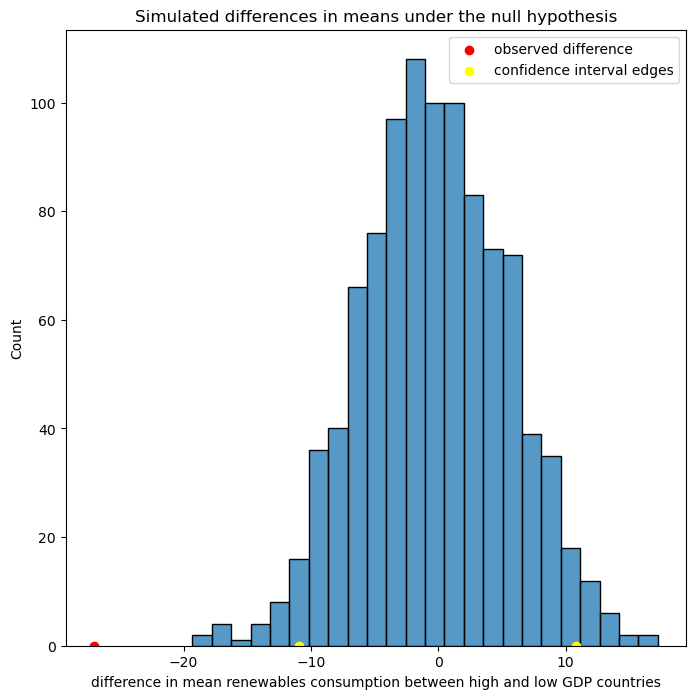

In [835]:
# PLOT IT!
plt.figure(figsize=(8,8))
sns.histplot(simulated_diffs)
plt.scatter(x=observed_diff, y=0, color='red', label='observed difference')
plt.scatter(x=[ci_lower, ci_upper], y=[0,0], color='yellow', label='confidence interval edges')
plt.legend()
plt.title("Simulated differences in means under the null hypothesis")
plt.xlabel("difference in mean renewables consumption between high and low GDP countries") 
plt.show()

In [837]:
# Compute the p-value
# p-value = proportion
p_value = (np.abs(simulated_diffs) >= np.abs(observed_diff)).mean()

print(f"Observed Difference: {observed_diff}")
print(f"P-value: {p_value}")

Observed Difference: -27.03621986631602
P-value: 0.0


This p-value answers the question of: If there is no real difference between renewables used for High and Low GDP classes (AKA the true difference is 0), how likely is it to see a difference in means at least as large as the one observed in the original data?

Our p-value of 0.0 indicates that there is essentially zero chance we would observe a difference as extreme as about -27%, and strongly supports an alternative hypothesis that **there is a significant difference in renewable energy consumed by "high" vs. "low" GDP countries.**

In addition, since the observed difference in means is nowhere near our 95% confidence interval of the simulated statistics, we have even more evidence to reject the null and support an alternative hypothesis.


Are there potential biases in the data? Did the data meet the assumptions of your analysis?

## 3) Inference (first try)))); ( maybe try correlation between electr access and renewables used) !

I would like to investigate whether or not there is a statistically significant relationship (correlation) between country GDP (averaged over the 20-year period) and the  proportion of renewable energy consumed out of the total (again, averaged).

I will start out with a null hypothesis that there is no correlation between the two, and the correlation coefficient equals 0.

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

correlations = []
slopes = []

for i in range(1000):
    boostrapped_countries = country_averages.sample(frac = 1, replace = True) # bootstrapped sample of same size

    # calculate correlation coefficient
    r = np.corrcoef(boostrapped_countries['log_gdp'], boostrapped_countries['Prop_renew_energy_consumed'])[0,1]
    correlations.append(r)

    # calculate slope of BFL
    model.fit(X = boostrapped_countries[['log_gdp']], y= boostrapped_countries['Prop_renew_energy_consumed'])
    slopes.append(model.coef_[0])

np.average(correlations)

KeyError: 'log_gdp'

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=country_averages['log_gdp'], y=country_averages['Prop_renew_energy_consumed'])

Let's look at some of the countries with the highest and lowest average gdp over the entire time period.

In [ ]:
sortCO2 = country_averages.sort_values('gdp', ascending=False).reset_index()
top5 = sortCO2.loc[:5]
lowest5 = sortCO2.loc[((sortCO2.shape[0]) - 5):]

display(top5[['Country', 'gdp']], lowest5[['Country', 'gdp']])

let's look at the country with the highest GDP, the U.S. (also one of the highest CO2 emitters) and look at its electricity production by source (fossil fuels, renewables, etc).

In [ ]:
usa = energy_simple[energy_simple['Country'] == 'United States']

# overlapping plot
plt.figure(figsize=(5,3))
sns.histplot(x=usa['FF_produced'], stat='density', kde=True, color='red', alpha=0.3, label='fossil fuels')
sns.histplot(x=usa['Nuc_produced'], stat='density', kde=True, color='blue', alpha=0.3, label='nuclear')
sns.histplot(x=usa['Renew_produced'], stat='density', kde=True, color='green', alpha=0.3, label='renewable')

# labels
plt.legend()
plt.title("Distribution Comparison of United States' electricity generation sources")
plt.xlabel('Average Electricity produced in TWh')
plt.ylabel('Density')

I'd like to compare high-gdp countries to low-gdp ones in terms of their energy usage and CO2 emissions.
- maybe change this to use top5 and lowest5 from above?

In [ ]:
# first separate countries into high and low GDP groups
gdp_analysis = energy_simple.copy()
gdp_analysis['high/low gdp'] = ['high' if x > energy_simple['gdp'].median() else 'low' for x in energy_simple['gdp']]

plt.figure(figsize=(3,3))

sns.lmplot(x='FF_produced', y='Renew_produced', hue='high/low gdp', data=gdp_analysis, fit_reg=True 
    );

# labels
plt.title('Fossil fuels vs renewables used for electricity production for high and low GDP countries')
plt.show()

# **Questions:**
Do high GDP countries have higher levels of renewable energy production, or do they rely more on fossil fuels?



(PREDICTION!!!:) which countries are likely to have higher CO₂ emissions based on factors like:
- electricity from FF 
- electricity from renewables
- proportion of energy from renewables
- total energy consumption (is it high?)
- gdp


Transition to clean energy: Identify countries transitioning toward low-carbon energy by comparing RENEWABLE ELECTRICITY production and the proportion of TOTAL energy derived from renewables.


correlation: Countries with high FF electricity production and low renewable production likely have significant CO2 EMISSIONS from both power generation and other sectors.